# Fashion MNIST with Simple CNN

Fashion MNIST is a dataset from Zalando e-commerce company. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
![alt text](https://user-images.githubusercontent.com/1741387/53153144-2328b300-35ea-11e9-8291-e146204598c7.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.
![alt text](https://user-images.githubusercontent.com/1741387/53153326-96cac000-35ea-11e9-951a-1322d26908a5.png)

In [0]:
# Download Fashion MNIST Dataset
# https://www.kaggle.com/zalando-research/fashionmnist
!rm -rf dataset && mkdir -p dataset
!wget -q https://www.dropbox.com/s/zmgrztk38nugjrd/fashionmnist.zip -O dataset/fashionmnist.zip
!cd dataset && unzip -q fashionmnist.zip

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

from matplotlib import cm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist

tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
# Check TensorFlow version and GPU device
if K.backend() == "tensorflow":
    device_name = tf.test.gpu_device_name()
    if device_name == '':
        device_name = "None"
    print('Using TensorFlow version:', tf.__version__, ', GPU:', device_name)

Using TensorFlow version: 1.13.1 , GPU: /device:GPU:0


In [0]:
img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    # Get all labels from the first columns for all rows.
    y = raw[:, 0]
    # Convert labels to one-hot encoding format
    out_y = keras.utils.to_categorical(y, num_classes)
    
    # Get all 784 pixels for all rows.
    x = raw[:,1:]
    # Get number of rows from CSV (Number of images).
    num_images = raw.shape[0]
    # Reshape all pixels into 60000 of images with
    # 28x28 pixels, 1 channel.
    # (60000, 28, 28, 1)
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    # Divide all pixels by 255 to get floating point values.
    out_x = out_x / 255
    
    return out_x, out_y

In [0]:
fashion_train_file = "dataset/fashion-mnist_train.csv"
# Load CSV file into NumPy array, skip the first line.
fashion_train_data = np.loadtxt(fashion_train_file, skiprows=1, delimiter=',')

In [0]:
x, y = prep_data(fashion_train_data)

In [0]:
# The Sequential model is a linear stack of layers.
fashion_model = Sequential()

In [0]:
fashion_model.add(Conv2D(
    filters=12,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(img_rows, img_cols, 1))
)

In [9]:
fashion_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
fashion_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(100, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 20)        2180      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 20)        3620      
_________________________________________________________________
flatten (Flatten)            (None, 9680)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               968100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 975,030
Trainable params: 975,030
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(
    lr=0.01,
    decay=0,
    momentum=0
)

fashion_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=sgd,
    metrics=['accuracy']
)

In [11]:
'''Batch size 100 will update weights every 100 training samples.
validation_split into 48,000 samples for training,
12,000 for validation.
'''
fashion_model.fit(
    x, 
    y,
    batch_size=100,
    epochs=5,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 172us/sample - loss: 0.9240 - acc: 0.6701 - val_loss: 0.6031 - val_acc: 0.7803
Epoch 2/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.5606 - acc: 0.7906 - val_loss: 0.5574 - val_acc: 0.8023
Epoch 3/5
48000/48000 [==============================] - 5s 110us/sample - loss: 0.4954 - acc: 0.8185 - val_loss: 0.4895 - val_acc: 0.8255
Epoch 4/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.4601 - acc: 0.8342 - val_loss: 0.4636 - val_acc: 0.8331
Epoch 5/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.4319 - acc: 0.8442 - val_loss: 0.4606 - val_acc: 0.8323


4423680/4422102 [==============================] - 0s 0us/step


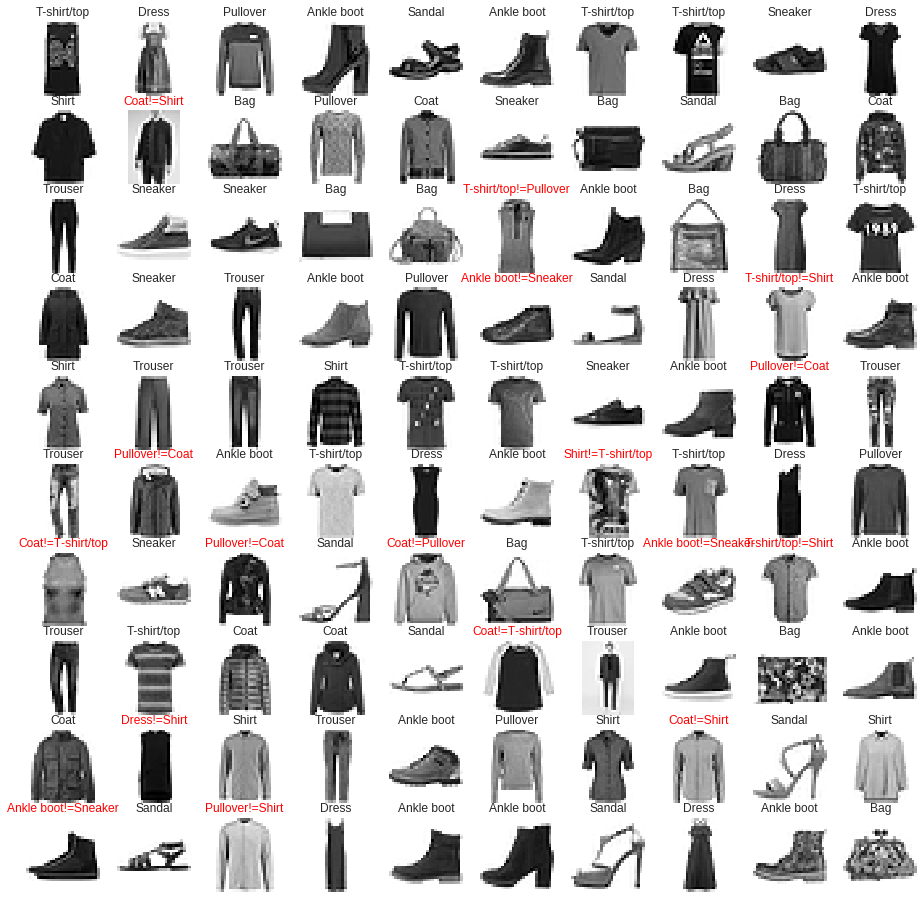

The number of correct answers: 83
The number of mistake: 17
A correct answer rate: 83.0 %


In [12]:
# The first two variables are x_train and x_test, we don't use it here.
(_, _), (x_test, y_test) = fashion_mnist.load_data()
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])


'''Convert pixels into floating point number,
and reshape it into (1,28,28,1) which is
(number_of_sample, width, height, channel).
'''
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
predictionNum = 100

for i in range(predictionNum):
    # Random one image from a test set.
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    prediction = fashion_model.predict(data, batch_size=1)

    best_prediction = 0.0
    best_class = 0
    # Loop through all classes to get the class that has highest prediction value.
    for label in [0,1,2,3,4,5,6,7,8,9]:
        if best_prediction < prediction[0][label]:
            best_prediction = prediction[0][label]
            best_class = label

    # If the model prediction is correct display this text:
    # Else display predicted class and labelled class.
    if y_test[index] == best_class:
        plt.title(fashion_mnist_labels[best_class])
        right += 1
    else:
        plt.title(fashion_mnist_labels[best_class] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right / (mistake + right) * 100, '%')

# Create your own model and tune hyperparameters.
## Challenge your self if you can reach more than 90% accuracy!

In [0]:
my_model = Sequential()

In [0]:
my_model.add(Conv2D(
    filters=12,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(img_rows, img_cols, 1))
)

In [20]:
my_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
my_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
my_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
my_model.add(Flatten())
my_model.add(Dense(100, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 20)        2180      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 20)        3620      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 20)        3620      
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               800100    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total para

In [0]:
my_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
my_model.fit(
    x, 
    y,
    batch_size=200,
    epochs=20,
    validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 119us/sample - loss: 0.5584 - acc: 0.8005 - val_loss: 0.4008 - val_acc: 0.8556
Epoch 2/20
48000/48000 [==============================] - 5s 108us/sample - loss: 0.3445 - acc: 0.8753 - val_loss: 0.3392 - val_acc: 0.8788
Epoch 3/20
48000/48000 [==============================] - 5s 108us/sample - loss: 0.2851 - acc: 0.8959 - val_loss: 0.2917 - val_acc: 0.8988
Epoch 4/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.2449 - acc: 0.9095 - val_loss: 0.2895 - val_acc: 0.8992
Epoch 5/20
48000/48000 [==============================] - 5s 108us/sample - loss: 0.2154 - acc: 0.9205 - val_loss: 0.2732 - val_acc: 0.9029
Epoch 6/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.1840 - acc: 0.9317 - val_loss: 0.2683 - val_acc: 0.9085
Epoch 7/20
48000/48000 [==============================] - 5s 109us/sample - loss: 0.1605 - acc: 0.9401 - val_l

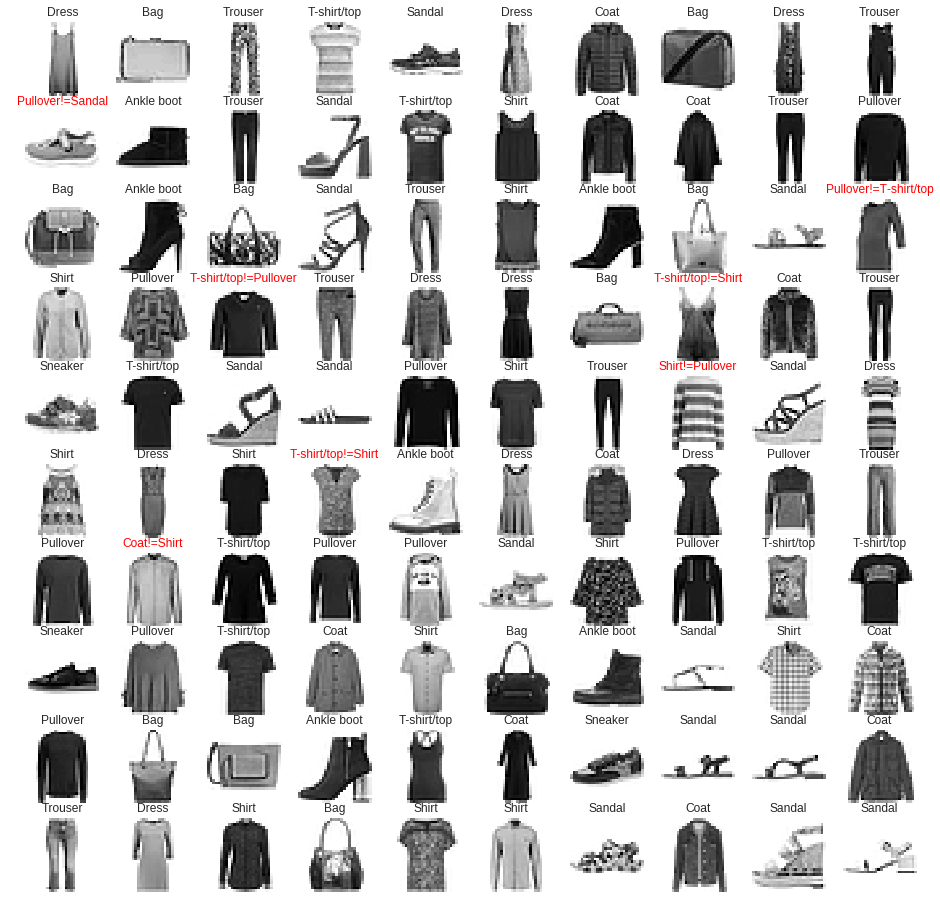

The number of correct answers: 93
The number of mistake: 7
A correct answer rate: 93.0 %


In [23]:
# The first two variables are x_train and x_test, we don't use it here.
(_, _), (x_test, y_test) = fashion_mnist.load_data()
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])


'''Convert pixels into floating point number,
and reshape it into (1,28,28,1) which is
(number_of_sample, width, height, channel).
'''
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
predictionNum = 100

for i in range(predictionNum):
    # Random one image from a test set.
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    prediction = my_model.predict(data, batch_size=1)

    best_prediction = 0.0
    best_class = 0
    # Loop through all classes to get the class that has highest prediction value.
    for label in [0,1,2,3,4,5,6,7,8,9]:
        if best_prediction < prediction[0][label]:
            best_prediction = prediction[0][label]
            best_class = label

    # If the model prediction is correct display this text:
    # Else display predicted class and labelled class.
    if y_test[index] == best_class:
        plt.title(fashion_mnist_labels[best_class])
        right += 1
    else:
        plt.title(fashion_mnist_labels[best_class] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right / (mistake + right) * 100, '%')